<a href="https://colab.research.google.com/github/25lahari/FMML_Projects_and_Labs/blob/main/AIML_Course_Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [12]:
def toss_coin(number_of_tosses=50):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=50):
    return pd.Series(np.random.randint(2, 5, number_of_tosses))

In [13]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Heads    28
Tails    22
Name: count, dtype: int64


In [14]:
results = pd.Series([np.sum(toss_coin(10) == 'Tails') for _ in range(100)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [15]:
results = pd.Series([np.sum(toss_coin(100) == 'Heads') for _ in range(50)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [16]:
results = {shots: throw_dice(shots) for shots in [100000, 10000, 1000, 100, 10]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [17]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Q']
    ranks = ['a', 'b', 'c', 'd']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

16 cards were thrown: Qc 7d 9d 2a 3b 7a 4b 7b 6d 5d Qb 4d 6b 5c Qd 10b Aa
0 cards were thrown: Ad
11 cards were thrown: Qa 5a 4a 3a 10a 10b 6b 8a 3c 2b 7c Ab
0 cards were thrown: Aa
0 cards were thrown: Ab
3 cards were thrown: 7a 4d 7d Ac
4 cards were thrown: 7a 5d 8b 9c Ac
0 cards were thrown: Ac
3 cards were thrown: 8d Qb 10a Ad
9 cards were thrown: 3b 2c Qc 4c 7b 5d 10c 2d Qb Ac

7.9824 cards are tossed before we see the first ace!


In [18]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

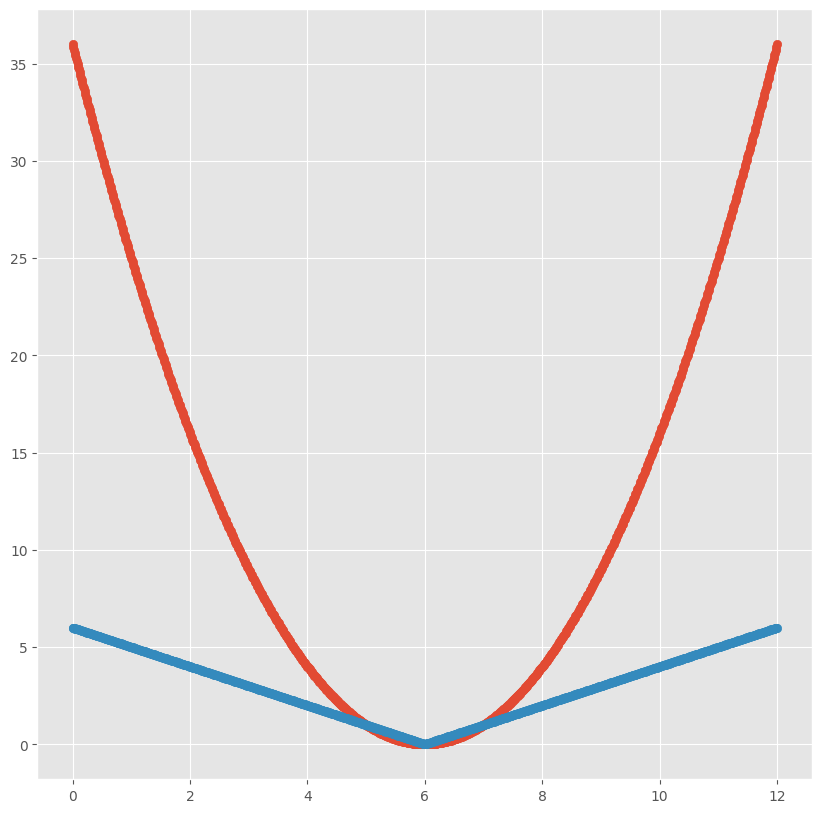

In [19]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [20]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
# Select only the numeric columns for aggregation
grades.select_dtypes(include='number').agg(["mean", "var", "std"])

(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


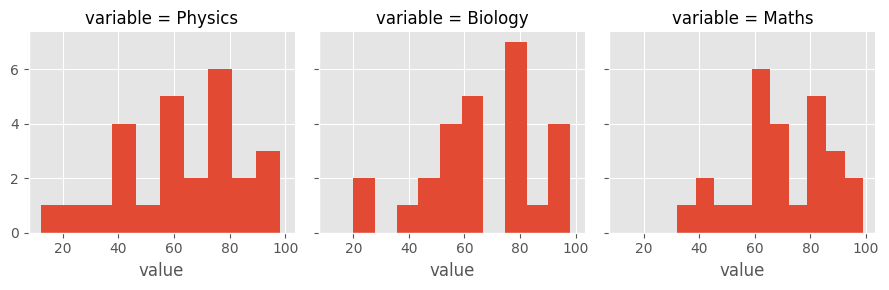

In [21]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [22]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [23]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [24]:
from scipy.stats import binom

In [25]:
binom.pmf(k=5, n=5, p=0.5)

0.03125

In [26]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

0.3671875

In [27]:
binom.cdf(3, n=5, p=0.75)

0.3671875

In [28]:
from scipy.stats import norm

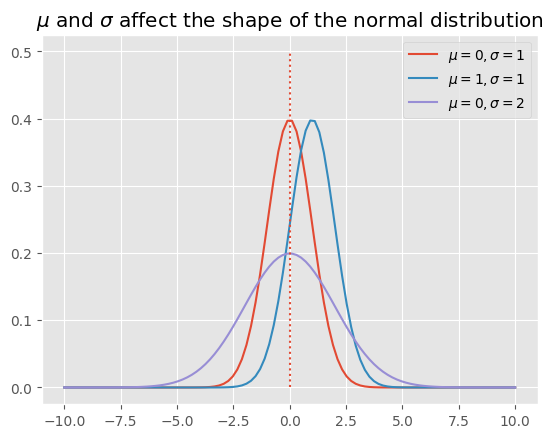

In [29]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [30]:
norm.cdf(0)

0.5

In [32]:
norm.ppf(0)

-inf

In [33]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [34]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [35]:
169.57 + 2 * 7.57

184.70999999999998

In [36]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [37]:
169.57 - 3 * 7.57

146.85999999999999

In [38]:
from scipy.stats import poisson

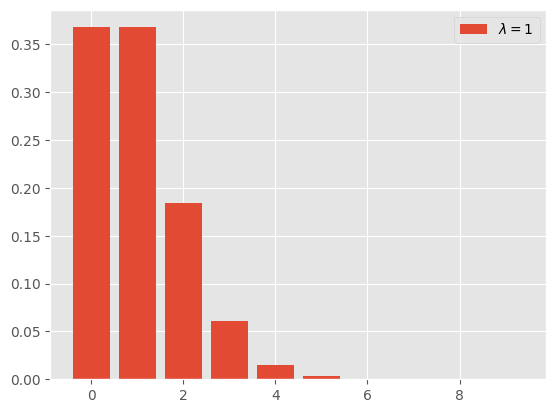

In [39]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


In [40]:
x @ f1

0.999998874797402

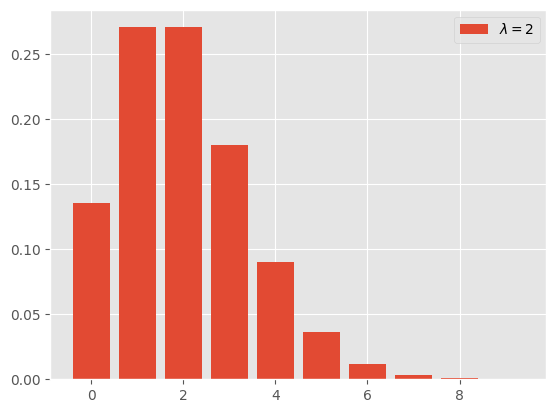

In [41]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [42]:
x @ f2

1.999525105343477

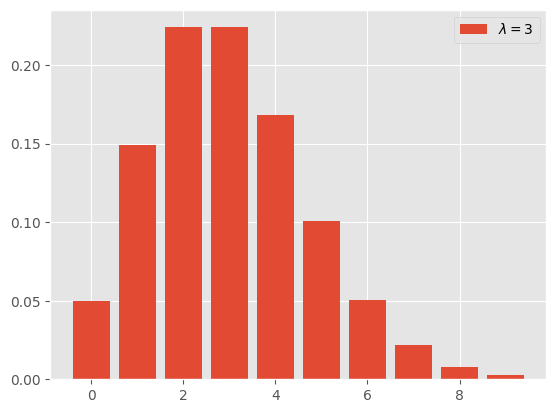

In [43]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [44]:
x @ f3

2.9885910238149727

In [45]:
poisson.pmf(3, 5)

0.1403738958142805

In [46]:
from scipy.stats import poisson

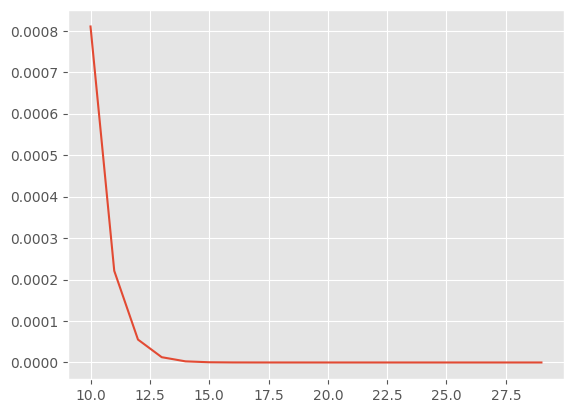

In [48]:
bins = np.arange(10, 30)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 6.,  7., 15.,  9., 17., 24.,  7., 10.,  2.,  3.]),
 array([2.2 , 2.37, 2.54, 2.71, 2.88, 3.05, 3.22, 3.39, 3.56, 3.73, 3.9 ]),
 <BarContainer object of 10 artists>)

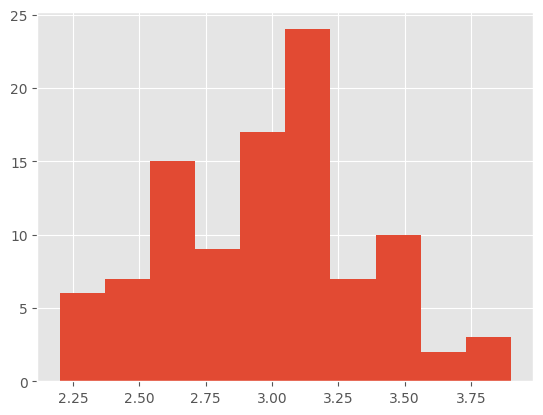

In [50]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(100)))
plt.hist(means)

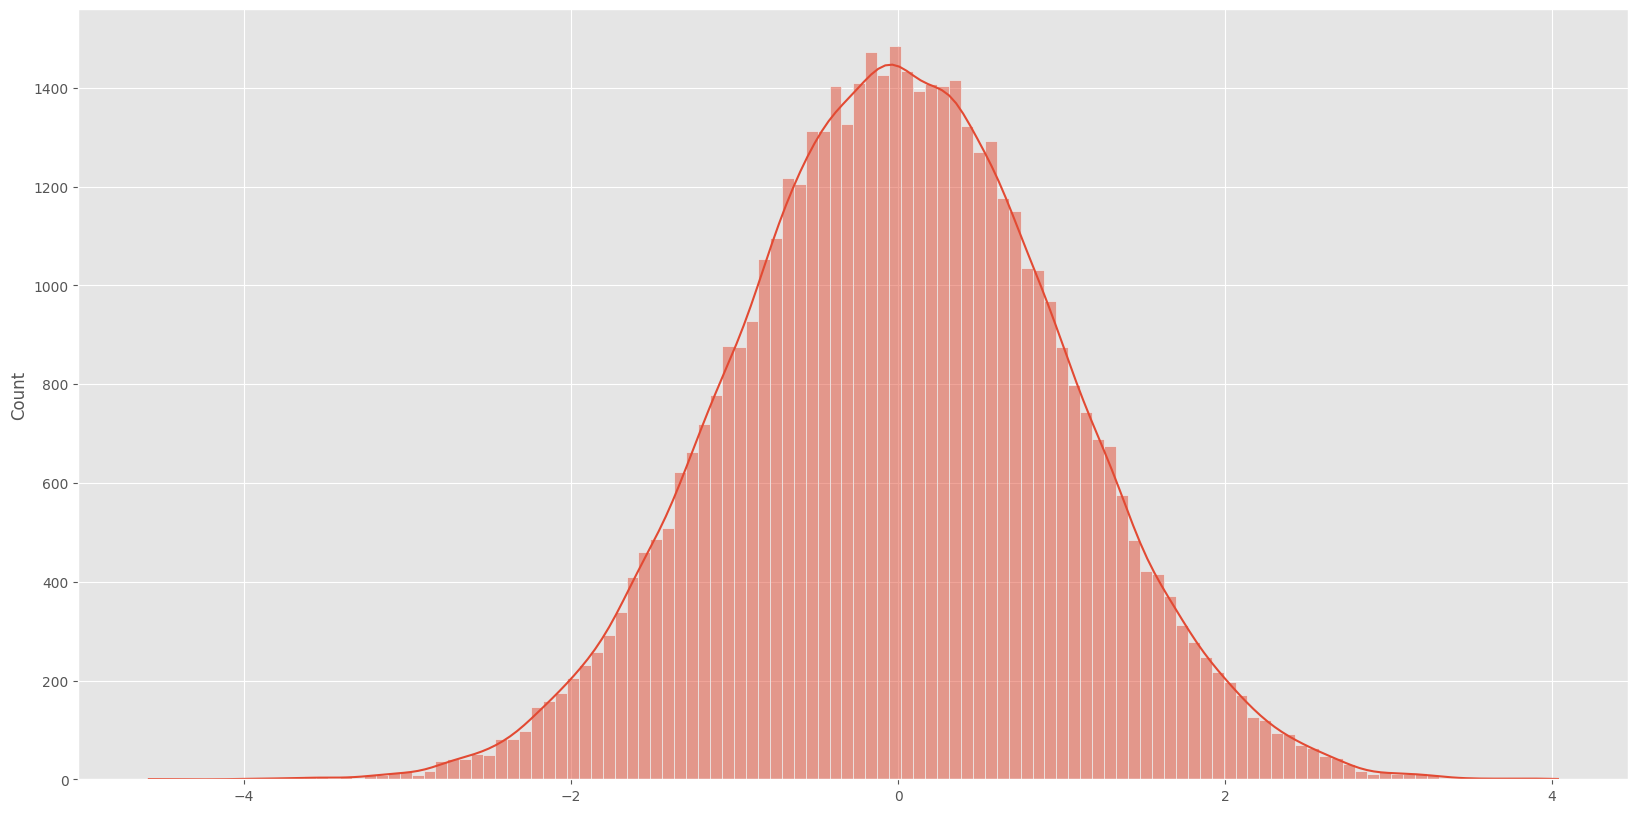

In [51]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

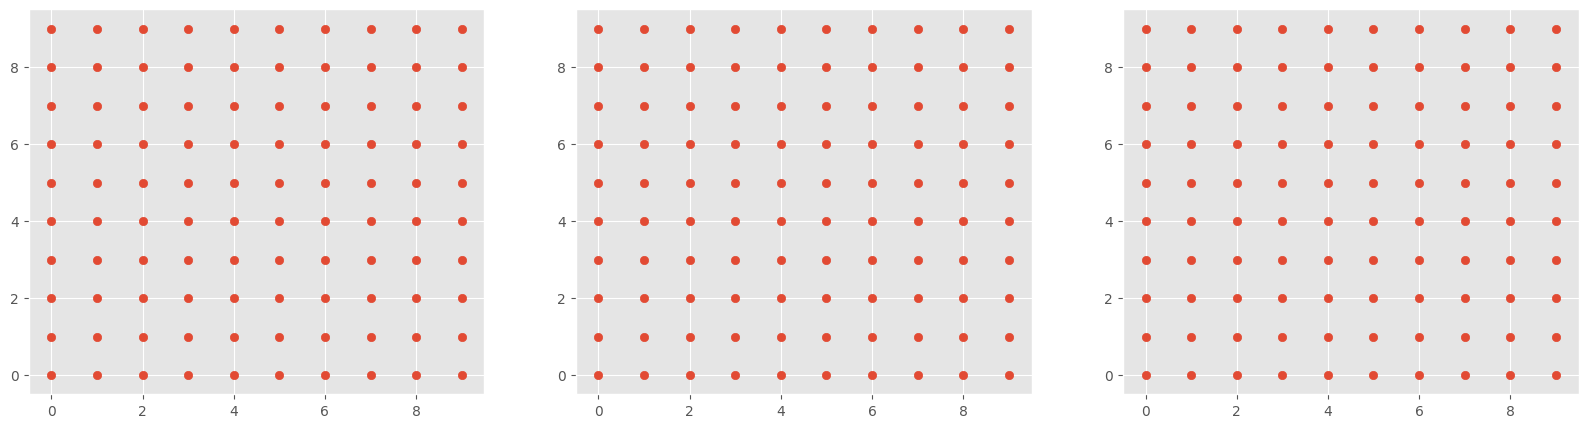

In [52]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

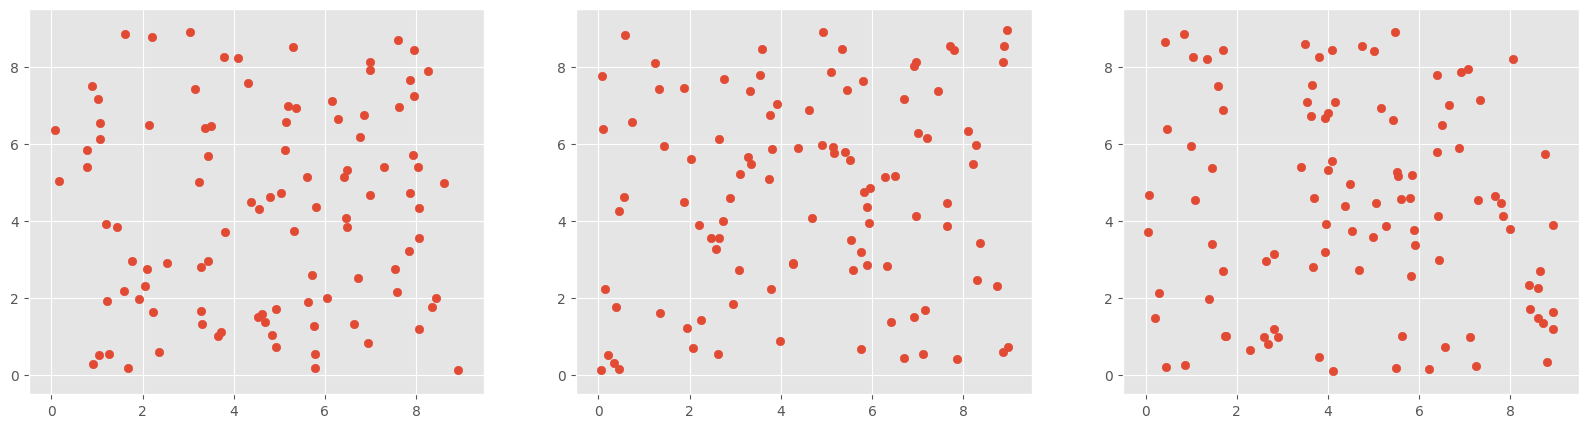

In [53]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

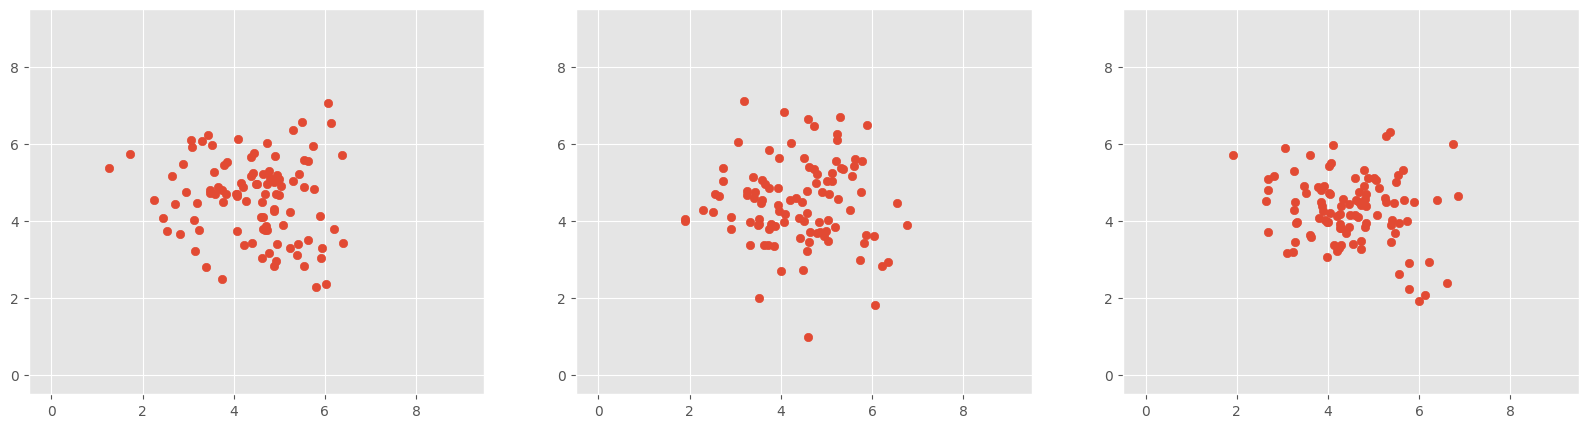

In [54]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()